# **K-means**

El agrupamiento K-Means es un algoritmo de Aprendizaje No Supervisado que agrupa un conjunto de datos no etiquetados en diferentes grupos (clusters). Aquí, K define el número de grupos predefinidos que necesitan crearse durante el proceso; por ejemplo, si $K=2$, habrá dos grupos, si $K=3$, habrá tres grupos, y así sucesivamente.

Es un algoritmo iterativo que divide el conjunto de datos no etiquetados en $k$ grupos diferentes, de tal manera que cada dato pertenece a un solo grupo que posee propiedades similares. Nos permite agrupar los datos en diferentes categorías y es una forma conveniente de descubrir las categorías de los grupos en el conjunto de datos por sí solo, sin necesidad de ningún entrenamiento (previo).

Es un algoritmo basado en centroides, donde cada grupo está asociado con un centroide. El objetivo principal de este algoritmo es minimizar la suma de las distancias entre los puntos de datos y sus grupos correspondientes.

<p align="center">
  <img src="img/kmeans01.png" width="600">
</p>

### **Funcionamiento del algoritmo K-means**

Tenemos un conjunto de datos como {$x_1, x_2, ..., x_n$}, donde $x_i=(x_{i1}, x_{i2}, ... ,x_{id})$ es un vector con d dimensiones.

**Paso 1: Elegir el numero de clusters K**: Este valor determina cuántos grupos se formarán en los datos.

**Paso 2: Inicializar los centroides**: Los centroides pueden seleccionarse aleatoriamente entre los puntos de datos o mediante una técnica como k-means++.

$$
\mu_1, \mu_2, \dots, \mu_k \in \mathbb{R}^d
$$

**Paso 3: Asignar cada punto al centroide más cercano**: Para cada punto $x^i$, se asigna al cluster $j$ cuyo centroide esté más cerca:

$$
c^{(i)} := \arg \min_{j} ||x^{(i)} - \mu_j||^2
$$

Esto significa que se calcula la distancia euclidiana de $x_i$ a cada centroide y se elige el más cercano.

**Paso 4: Actualización de centroides**: Después de asignar todos los puntos, se recalculan los centroides de cada cluster como el promedio de los puntos asignados (el centro de masa):

$$
\mu_j := \frac{\sum_{i=1}^{n} 1\{c^{(i)} = j\}x^{(i)}}{\sum_{i=1}^{n} 1\{c^{(i)} = j\}}
$$

donde $1{c^{(i)}=j}$ es una funcion indicadora que vale 1 si el punto $x^(i) pertenece al cluster $j$, y 0 en caso contrario. 

**Paso 5: Repetir los pasos 3 y 4**: Seguir reasignando puntos y recalculando centroides hasta que:

- Las asignaciones $c^{(i)}$ ya no cambien, o
- Los centroides $\mu_j$ se estabilicen (no se muevan significativamente).

**Paso 6: Resultado Final**: Los centroides finales $\mu_1, \mu_2, \dots, \mu_k$ representan los centros de los clusters, y cada punto $x_i$ tiene una etiqueta que indica a qué cluster pertenece. El algoritmo finaliza cuando alcanza la convergencia.


## Implementacion

In [7]:
import random
import math
import matplotlib.pyplot as plt

def distancia(p1, p2):
    """Distancia euclidiana entre dos puntos."""
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

def promedio(puntos):
    """Calcula el centroide (promedio) de una lista de puntos."""
    n = len(puntos)
    dim = len(puntos[0])
    return [sum(p[i] for p in puntos) / n for i in range(dim)]

In [8]:
def kmeans(datos, k, max_iter=100):
    centroides = random.sample(datos, k)

    for _ in range(max_iter):
        grupos = [[] for _ in range(k)]
        for punto in datos:
            distancias = [distancia(punto, c) for c in centroides]
            indice_cercano = distancias.index(min(distancias))
            grupos[indice_cercano].append(punto)

        nuevos_centroides = []
        for i in range(k):
            if grupos[i]:
                nuevos_centroides.append(promedio(grupos[i]))
            else:
                nuevos_centroides.append(random.choice(datos))

        if all(distancia(centroides[i], nuevos_centroides[i]) < 1e-6 for i in range(k)):
            break

        centroides = nuevos_centroides

    etiquetas = []
    for punto in datos:
        distancias = [distancia(punto, c) for c in centroides]
        etiquetas.append(distancias.index(min(distancias)))

    return centroides, etiquetas

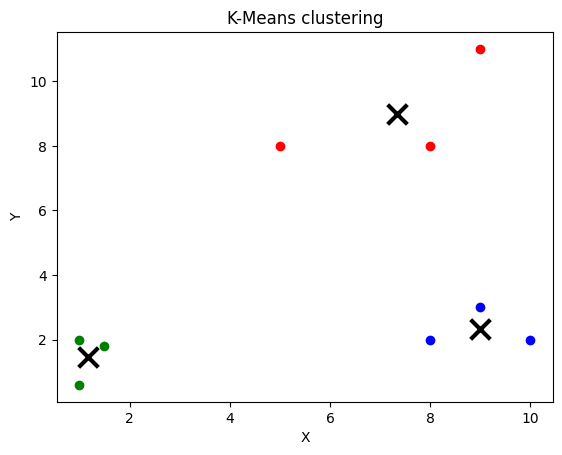

In [10]:
datos = [
    [1.0, 2.0], [1.5, 1.8], [5.0, 8.0],
    [8.0, 8.0], [1.0, 0.6], [9.0, 11.0],
    [8.0, 2.0], [10.0, 2.0], [9.0, 3.0]
]

k = 3
centroides, etiquetas = kmeans(datos, k)

colores = ['red', 'green', 'blue', 'orange', 'purple']

# Dibujar puntos según su cluster
for i in range(k):
    puntos_cluster = [p for p, e in zip(datos, etiquetas) if e == i]
    xs = [p[0] for p in puntos_cluster]
    ys = [p[1] for p in puntos_cluster]
    plt.scatter(xs, ys, color=colores[i])

for i, c in enumerate(centroides):
    plt.scatter(c[0], c[1], color='black', marker='x', s=200, linewidths=3)

plt.title('K-Means clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Implementacion con sklearn

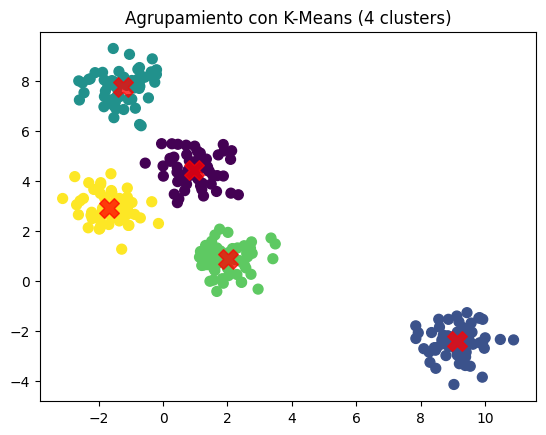

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Agrupamiento con K-Means (4 clusters)")
plt.show()


### **Funcion Objetivo**

El algoritmo busca minimizar la suma de las distancias cuadradas de cada punto a su centroide:

$$
J(c, \mu) = \sum_{i=1}^{n} ||x^{(i)} - \mu_{c^{(i)}}||^2
$$

Esta función $J$ se llama función de distorsión (distortion function o within-cluster sum of squares). Cada iteración del algoritmo disminuye o mantiene constante $J$, garantizando que K-Means converge (aunque no necesariamente al mínimo global, ya que $J$ no es convexa).

### **Elbow Method**

El método del codo es una de las formas más populares para encontrar el número óptimo de clusters. Utiliza el concepto del valor WCSS (Within Cluster Sum of Squares - Suma de Cuadrados dentro del Cluster) o tambien llamado funcion objetivo $J$, que define las variaciones totales dentro de un grupo.

Para encontrar el valor óptimo de clusters, el método sigue estos pasos:
- Ejecuta k-means en el conjunto de datos para diferentes valores de $K$ (generalmente del 1 al 10).
- Para cada valor de $K$, calcula el valor WCSS.
- Traza una curva entre los valores WCSS calculados y el número de clusters $K$.
- El punto de quiebre o "doblez" en la gráfica, que parece un codo en un brazo, se considera el mejor valor de $K$.

<p align="center">
  <img src="img/kmeans02.png" width="400">
</p>

In [32]:
def WCSS(datos, centroides, etiquetas):
    """Calcula el Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for punto, etiqueta in zip(datos, etiquetas):
        c = centroides[etiqueta]
        wcss += distancia(punto, c) ** 2
    return wcss

K=1, WCSS=222.7600
K=2, WCSS=111.8150
K=3, WCSS=18.6467
K=4, WCSS=16.9800
K=5, WCSS=7.8117
K=6, WCSS=14.8117
K=7, WCSS=5.5000
K=8, WCSS=1.0000


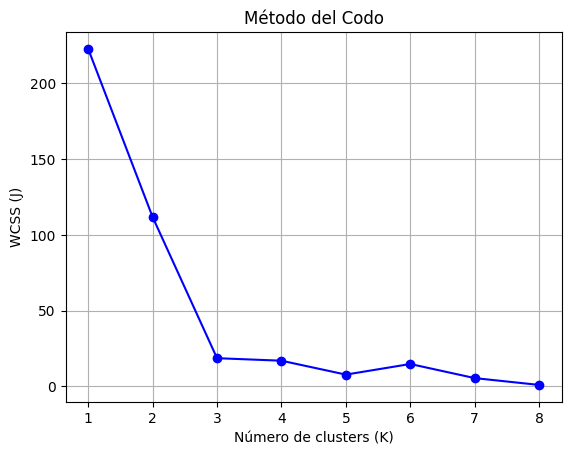

In [52]:
wcss_lista = []

datos = [
        [1.0, 2.0], [1.5, 1.8], [5.0, 8.0],
        [8.0, 8.0], [1.0, 0.6], [9.0, 11.0],
        [8.0, 2.0], [10.0, 2.0], [9.0, 3.0]
]

k_min = 1
k_max = len(datos)

for k in range(k_min, k_max):
    centroides, etiquetas = kmeans(datos, k)
    wcss = WCSS(datos, centroides, etiquetas)
    wcss_lista.append(wcss)
    print(f"K={k}, WCSS={wcss:.4f}")

plt.plot(range(k_min, k_max), wcss_lista, marker='o', color='blue')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WCSS (J)')
plt.grid(True)
plt.show()

## Implementacion con sklearn

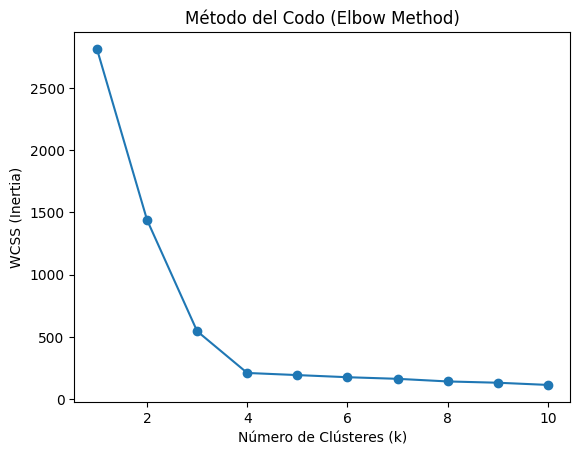

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()
